# Predicting Year 2 Fantasy Points based on Combine Data 2002-2018

## Imports

In [34]:
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
import matplotlib
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
from sklearn import linear_model
from yellowbrick.regressor import AlphaSelection
from sklearn.decomposition import PCA

import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Reading and Inspecting in the Data

In [35]:
url = '/Users/VishalDubey/Vishal/College/polsci189fs/FF Project/Data/allData.csv'
df = pd.read_csv(url)
data = df

In [36]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick,yr2
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,634.609065,3159.716714,73.120397,218.719547,4.571792,34.794014,18.898734,118.647378,7.002361,4.244398,2009.208215,9.830028,3.382436,96.961756,4.133641
std,292.202014,1408.384919,2.825609,23.011020,0.168066,2.872071,3.667753,5.605499,0.176839,0.129835,4.294214,9.466447,1.837645,65.805365,3.966987
min,119.000000,667.000000,66.000000,165.000000,4.220000,25.500000,7.000000,100.000000,6.500000,3.780000,2002.000000,-4.000000,1.000000,1.000000,-1.500000
25%,382.250000,1984.750000,71.000000,202.000000,4.450000,33.125000,18.000000,116.000000,6.930000,4.190000,2006.000000,2.000000,2.000000,43.250000,1.000000
50%,652.500000,3229.500000,73.000000,217.000000,4.540000,34.794014,18.898734,118.647378,7.002361,4.244398,2009.000000,7.000000,3.000000,88.000000,3.081169
75%,880.750000,4331.000000,75.000000,232.000000,4.670000,36.000000,19.000000,122.000000,7.050000,4.280000,2013.000000,15.000000,5.000000,142.750000,6.176339
max,1123.000000,5544.000000,80.000000,275.000000,5.240000,45.000000,35.000000,139.000000,7.860000,4.820000,2016.000000,51.000000,7.000000,257.000000,23.437500


Pandas Profiling Report - Stored in 'report.html' file

## Inspecting Historgram of Fantasy Points

,medv,Value
0,mean,4.133641
1,median,3.081169


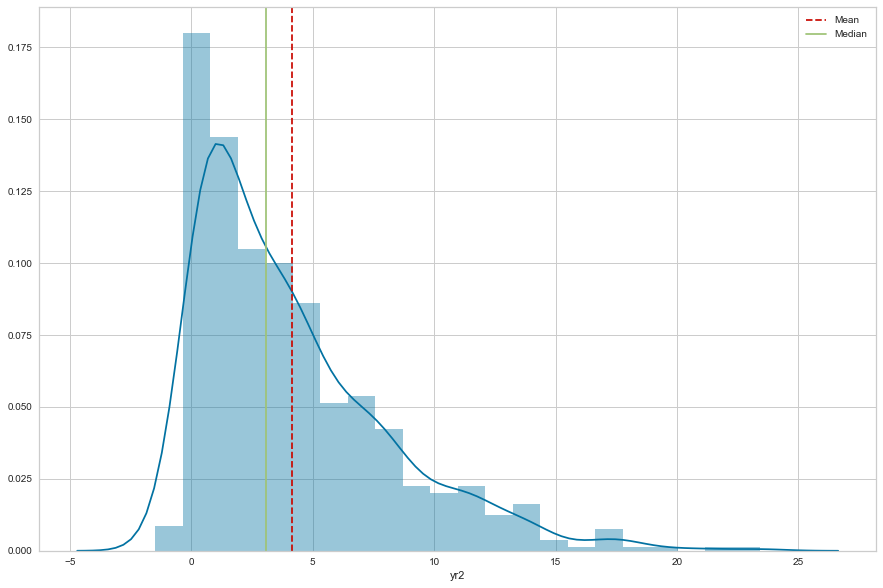

In [37]:
#describes values chosen 
vals = 'Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,AV,Round,Pick'.split(',')
#predictors
X = data[vals].values

#target variable
y = data['yr2'].values

#Plot creation
plt.figure(figsize=(15,10))
plt.tight_layout()

seabornInstance.distplot(data['yr2'])
mean=data['yr2'].mean()
median=data['yr2'].median()

plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'medv': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

## Splitting into Test and Train Sets and Normalizing Values

In [38]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## ElasticNetCV: Lasso Regularization with K-Fold Cross-Validation

In [39]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=5, copy_X=True, verbose=0, n_jobs=None)
ElasticModel.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [40]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
y_pred = ElasticModel.predict(X_test)
# check out accuracy 
print("Polynomial Regression Accuracy on Test Set: ", r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coefs = pd.DataFrame({ 'Variables': vals, 'Coefficients': ElasticModel.coef_})
display(coefs)

print("Intercept: " + str(ElasticModel.intercept_))

ElasticNet Predict with transformations:
Polynomial Regression Accuracy on Test Set:  0.5150110696912122
Mean Squared Error: 5.845754365027103
Root Mean Squared Error: 2.417799488176615


,Variables,Coefficients
0,Ht,-0.185669
1,Wt,0.063115
2,Forty,0.451605
3,Vertical,-0.050164
4,BenchReps,-0.117109
5,BroadJump,0.000000
6,Cone,-0.032942
7,Shuttle,-0.038372
8,AV,2.717944
9,Round,-0.000000


Intercept: 4.2555476044837794


## Bootstrap with 1000 Resamples

In [41]:
bootstrap_iter = 1000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
clf = ElasticModel
intercept =[]
for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    intercept.append(clf.intercept_)

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)

avg_ints = sum(intercept)/len(intercept)

for x in range(len(average)):
    average[x] = average[x]/len(average)
    
 

avgPD = pd.DataFrame({'Variables': vals, 'Average Coefficients': clf.coef_})
avgintPD = pd.DataFrame({'Average Intercept': ['avg_int'], 'Value': [avg_ints]})

display(avgPD)
display(avgintPD)

print('Mean Squared Error:', statistics.mean(accuracy))
print('Root Mean Squared Error:', np.sqrt(statistics.mean(accuracy)))

,Variables,Average Coefficients
0,Ht,-0.024775
1,Wt,0.036435
2,Forty,0.252693
3,Vertical,-0.000000
4,BenchReps,0.000000
5,BroadJump,-0.000000
6,Cone,0.026187
7,Shuttle,0.165889
8,AV,2.649613
9,Round,-0.290060


,Average Intercept,Value
0,avg_int,4.258396


Mean Squared Error: 6.010952595716876
Root Mean Squared Error: 2.451724412677101


## Feature Selection - Principal Component Analysis

In [42]:
pca = PCA(.8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticModel.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [44]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
y_pred = ElasticModel.predict(X_test)
# check out accuracy 
print("Polynomial Regression Accuracy on Test Set: ", r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coefs = pd.DataFrame({'Coefficients': clf.coef_})
display(coefs)

print("Intercept: " + str(clf.intercept_))

ElasticNet Predict with transformations:
Polynomial Regression Accuracy on Test Set:  0.42156783238442097
Mean Squared Error: 6.972060922211098
Root Mean Squared Error: 2.6404660426165485


,Coefficients
0,-0.024775
1,0.036435
2,0.252693
3,-0.000000
4,0.000000
5,-0.000000
6,0.026187
7,0.165889
8,2.649613
9,-0.290060


Intercept: 4.289472529020546


## Random Forest and Feature Importances

In [45]:
lab_enc = preprocessing.LabelEncoder()
rfData = pd.DataFrame()
for i in data.columns:
    encoded = lab_enc.fit_transform(data[i])
    rfData[i] = encoded

In [46]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(rfData.loc[:, vals], rfData['yr2'], test_size=0.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [47]:
rf = RandomForestClassifier(n_estimators=1000, oob_score=True)
rf = rf.fit(X_train, y_train)

In [48]:
# check out accuracy 
print("Random Forest OOB Score: "+str(rf.oob_score_))
y_pred = rf.predict(X_test)
print("Random Forest Accuracy on Test Set: ", metrics.accuracy_score(y_test, y_pred, normalize = True))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest OOB Score: 0.008865248226950355
Random Forest Accuracy on Test Set:  0.007042253521126761
Mean Squared Error:  9148.55633802817
Root Mean Squared Error:  95.64808590885742


In [49]:
#Printing Feature Importances

print("Random Forest Feature Importances - Scaled")
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(vals, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
importances = []
names = []
for i in range(len(feature_importances)):
    names.append(feature_importances[i][0])
    importances.append(feature_importances[i][1])
rounded = [np.round(x*100/importances[0], 0) for x in importances]


tabled = pd.DataFrame() 
tabled['Variable'] = names
tabled['Importance'] = importances
tabled['Scaled as Percent'] = rounded

tabled

Random Forest Feature Importances - Scaled


,Variable,Importance,Scaled as Percent
0,Wt,0.12,100.0
1,Pick,0.12,100.0
2,Forty,0.11,92.0
3,AV,0.10,83.0
4,Vertical,0.09,75.0
5,BroadJump,0.09,75.0
6,Cone,0.09,75.0
7,Ht,0.08,67.0
8,BenchReps,0.08,67.0
9,Shuttle,0.08,67.0
